# Analisando os algoritmos de busca aplicados ao problema da Mochila Binária

Esse notebook tem como objetivo analisar os dados obtidos ao rodarmos os algoritmos de busca em 800 casos de teste gerados de forma pseudo-aleatória.

## Importando os dados dos testes

Aqui simplesmente adicionamos as bibliotecas que serão usadas e importamos o .csv que conteḿ os resultados de cada um dos testes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
results = pd.read_csv("out.csv")
results.rename({" size": "Tamanho do Problema", "time":"Tempo (ms)", "count":"N° de Passos"}, inplace=True, axis=1)
results

,case_test,Tamanho do Problema,search_type,N° de Passos,Tempo (ms),ids,right_answer
0,tests/0-test.txt,4,Blind Search,64,0.007,1 2,1 2
1,tests/0-test.txt,4,Best-Fit Search,4,0.008,1 2,1 2
2,tests/0-test.txt,4,B&B DFS,1,0.010,1 2,1 2
3,tests/0-test.txt,4,B&B BFS,1,0.010,1 2,1 2
4,tests/1-test.txt,8,Blind Search,2048,0.037,2 4 5 7,2 4 5 7
5,tests/1-test.txt,8,Best-Fit Search,8,0.012,2 5 4 7,2 4 5 7
6,tests/1-test.txt,8,B&B DFS,1,0.013,2 4 5 7,2 4 5 7
7,tests/1-test.txt,8,B&B BFS,1,0.014,2 4 5 7,2 4 5 7
8,tests/2-test.txt,10,Blind Search,10240,0.142,0 2 5 7 9,0 2 5 7 9
9,tests/2-test.txt,10,Best-Fit Search,10,0.014,7 9 0 5 8 1 4 6,0 2 5 7 9


Agora, nós vamos dividir os resultados dos testes por cada um dos algoritmos.

In [3]:
blind_search = results[results[" search_type"] == "Blind Search"]
best_fit = results[results[" search_type"] == "Best-Fit Search"]
BB_DFS = results[results[" search_type"] == "B&B DFS"]
BB_BFS = results[results[" search_type"] == "B&B BFS"]

## Analisando o Blind Search

Agora, vamos analisar os resultados do Blind Search. O primeiro passo é verificar valores que possam ter gerado algum erro, pois sabemos que em alguns casos o número de passos estourou o tamanho limite da variável de contagem. Para esses casos, iremos considerar count como infinito.

In [4]:
blind_search.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 3200
Data columns (total 7 columns):
case_test              801 non-null object
Tamanho do Problema    801 non-null int64
 search_type           801 non-null object
N° de Passos           801 non-null int64
Tempo (ms)             801 non-null float64
ids                    732 non-null object
right_answer           732 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 50.1+ KB


Podemos ver que em (801 - 732) casos, o caso de teste não apresentava solução. 

Vamos cuidar agora da variável count.

In [5]:
blind_search["N° de Passos"][blind_search["N° de Passos"] < 0] = np.inf

In [6]:
blind_search.describe()

,Tamanho do Problema,N° de Passos,Tempo (ms)
count,801.000000,8.010000e+02,801.000000
mean,16.942572,inf,3082.369170
std,5.881683,NaN,7912.520584
min,1.000000,2.000000e+00,0.004000
25%,12.000000,4.915200e+04,0.599000
50%,17.000000,2.228224e+06,23.213000
75%,22.000000,9.227469e+07,922.570000
max,27.000000,inf,37201.600000


### Análise do tempo de execução

Vamos verificar como o tempo varia em relação ao tamanho do problema

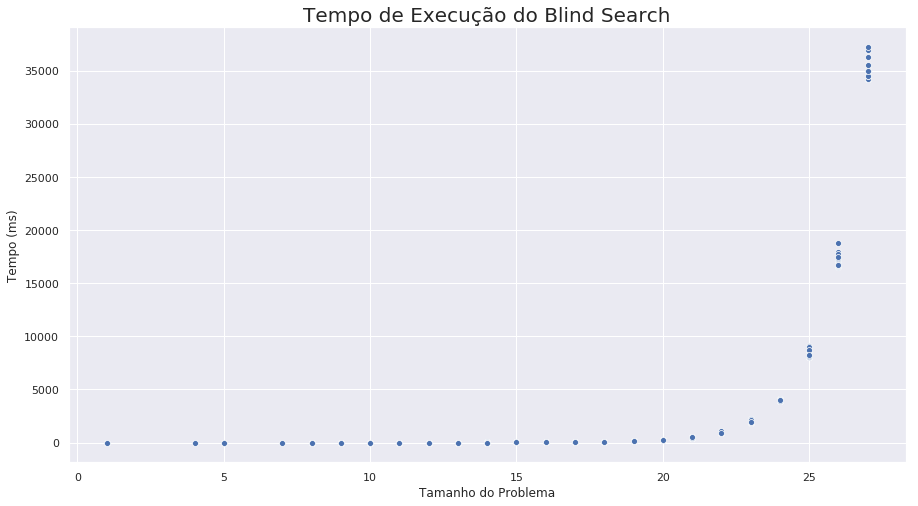

In [7]:
plt.figure(figsize=(15,8))
plt.title("Tempo de Execução do Blind Search", fontdict={"fontsize": 20})
sns.scatterplot(x = blind_search["Tamanho do Problema"], y = blind_search["Tempo (ms)"])
plt.savefig("graficos/blind_tempo")

### Análise do número de passos

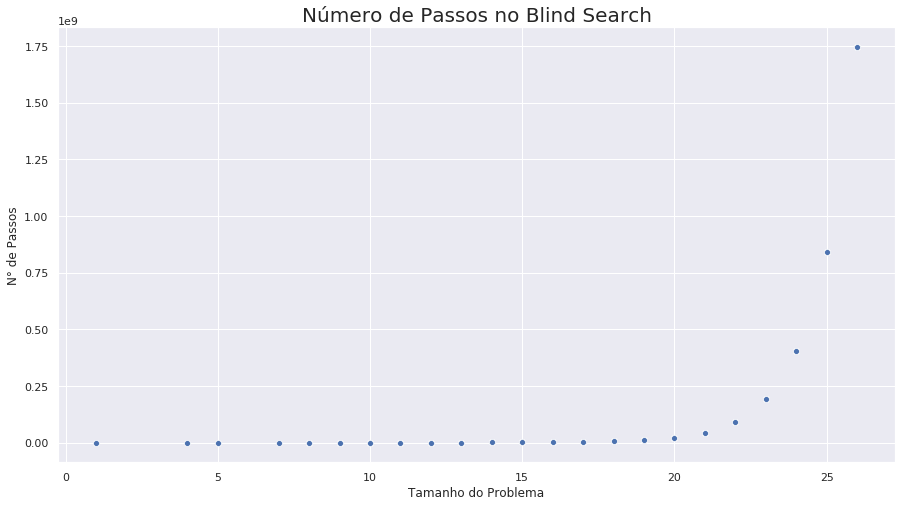

In [8]:
plt.figure(figsize=(15,8))
plt.title("Número de Passos no Blind Search", fontdict={"fontsize": 20})
sns.scatterplot(x = blind_search["Tamanho do Problema"], y = blind_search["N° de Passos"])
plt.savefig("graficos/blind_passos")

## Analisando o Best-Fit

In [9]:
best_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 3201
Data columns (total 7 columns):
case_test              801 non-null object
Tamanho do Problema    801 non-null int64
 search_type           801 non-null object
N° de Passos           801 non-null int64
Tempo (ms)             801 non-null float64
ids                    732 non-null object
right_answer           732 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [10]:
best_fit.describe()

,Tamanho do Problema,N° de Passos,Tempo (ms)
count,801.000000,801.000000,801.000000
mean,16.942572,16.942572,0.023883
std,5.881683,5.881683,0.009344
min,1.000000,1.000000,0.005000
25%,12.000000,12.000000,0.017000
50%,17.000000,17.000000,0.022000
75%,22.000000,22.000000,0.031000
max,27.000000,27.000000,0.069000


Como podemos ver, o Best-Fit não teve problema de estourar o número de passos.

### Análise do Tempo de Execução

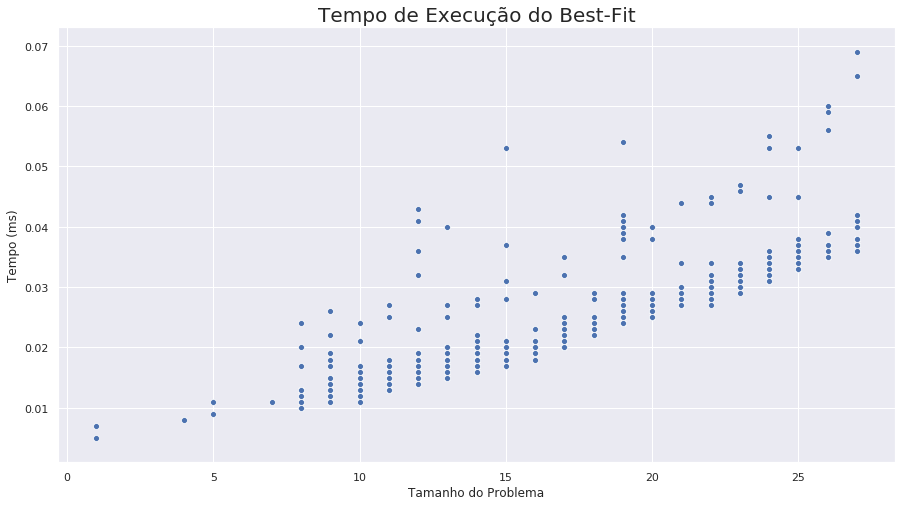

In [11]:
plt.figure(figsize=(15,8))
plt.title("Tempo de Execução do Best-Fit", fontdict={"fontsize": 20})
sns.scatterplot(x = best_fit["Tamanho do Problema"], y = best_fit["Tempo (ms)"])
plt.savefig("graficos/best_tempo")

### Análise do Número de Passos

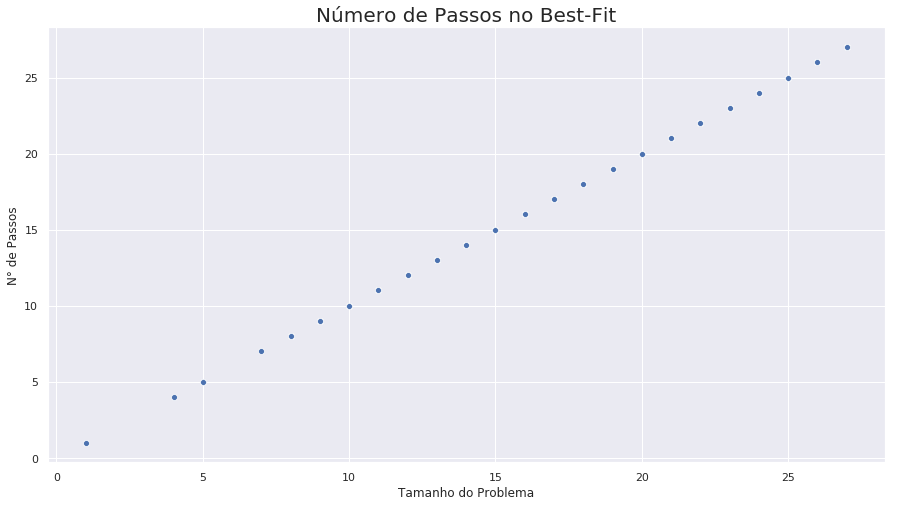

In [12]:
plt.figure(figsize=(15,8))
plt.title("Número de Passos no Best-Fit", fontdict={"fontsize": 20})
sns.scatterplot(x = best_fit["Tamanho do Problema"], y = best_fit["N° de Passos"])
plt.savefig("graficos/best_passos")

## Analisando o Branch and Bound DFS

In [13]:
BB_DFS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 2 to 3202
Data columns (total 7 columns):
case_test              801 non-null object
Tamanho do Problema    801 non-null int64
 search_type           801 non-null object
N° de Passos           801 non-null int64
Tempo (ms)             801 non-null float64
ids                    732 non-null object
right_answer           732 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [14]:
BB_DFS.describe()

,Tamanho do Problema,N° de Passos,Tempo (ms)
count,801.000000,801.000000,801.000000
mean,16.942572,75.731586,0.624693
std,5.881683,77.407810,0.762196
min,1.000000,1.000000,0.010000
25%,12.000000,29.000000,0.161000
50%,17.000000,47.000000,0.354000
75%,22.000000,97.000000,0.762000
max,27.000000,571.000000,6.515000


### Análise do tempo

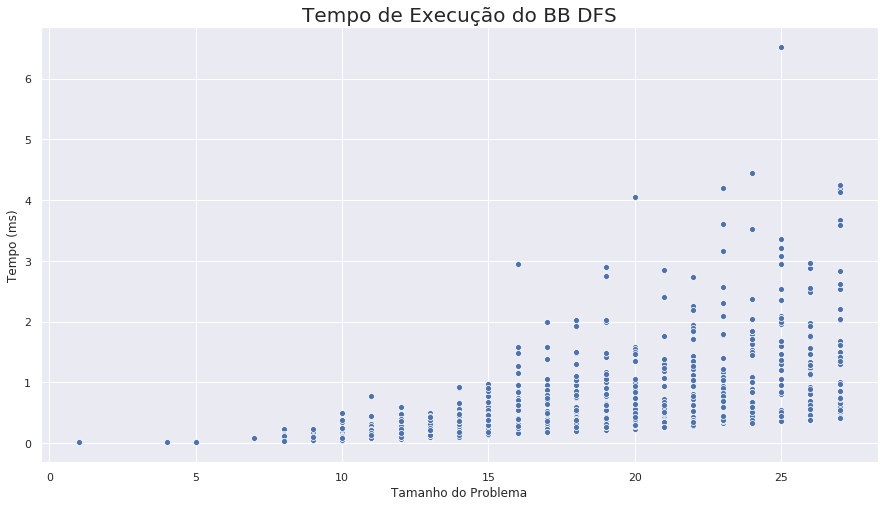

In [15]:
plt.figure(figsize=(15,8))
plt.title("Tempo de Execução do BB DFS", fontdict={"fontsize": 20})
sns.scatterplot(x = BB_DFS["Tamanho do Problema"], y = BB_DFS["Tempo (ms)"])
plt.savefig("graficos/BB_DFS_tempo")

### Análise do Número de Passos

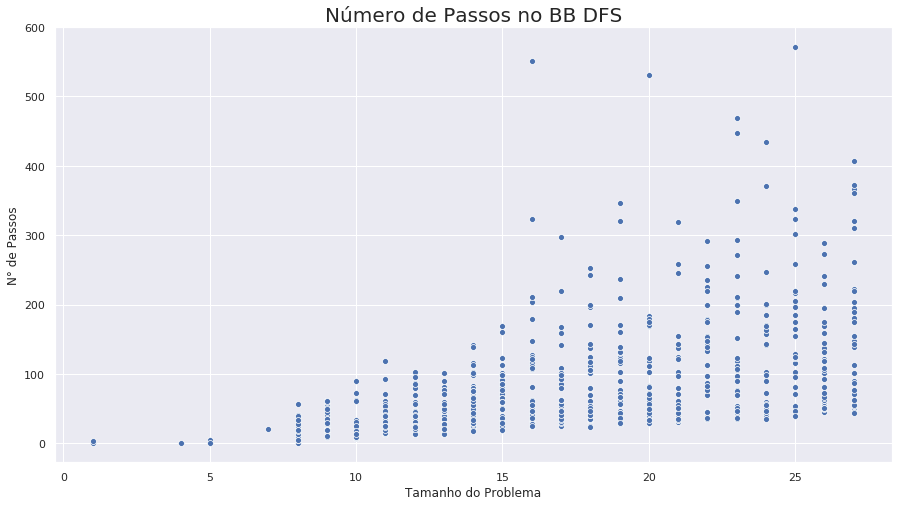

In [16]:
plt.figure(figsize=(15,8))
plt.title("Número de Passos no BB DFS", fontdict={"fontsize": 20})
sns.scatterplot(x = BB_DFS["Tamanho do Problema"], y = BB_DFS["N° de Passos"])
plt.savefig("graficos/BB_DFS_passos")

## Análise do Branch and Bound BFS

In [17]:
BB_BFS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 3 to 3203
Data columns (total 7 columns):
case_test              801 non-null object
Tamanho do Problema    801 non-null int64
 search_type           801 non-null object
N° de Passos           801 non-null int64
Tempo (ms)             801 non-null float64
ids                    732 non-null object
right_answer           732 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [18]:
BB_BFS.describe()

,Tamanho do Problema,N° de Passos,Tempo (ms)
count,801.000000,801.000000,801.000000
mean,16.942572,5382.131086,65.740652
std,5.881683,14054.046994,181.782096
min,1.000000,1.000000,0.010000
25%,12.000000,79.000000,0.610000
50%,17.000000,461.000000,4.153000
75%,22.000000,3479.000000,38.245000
max,27.000000,148605.000000,1958.500000


### Analisando o tempo

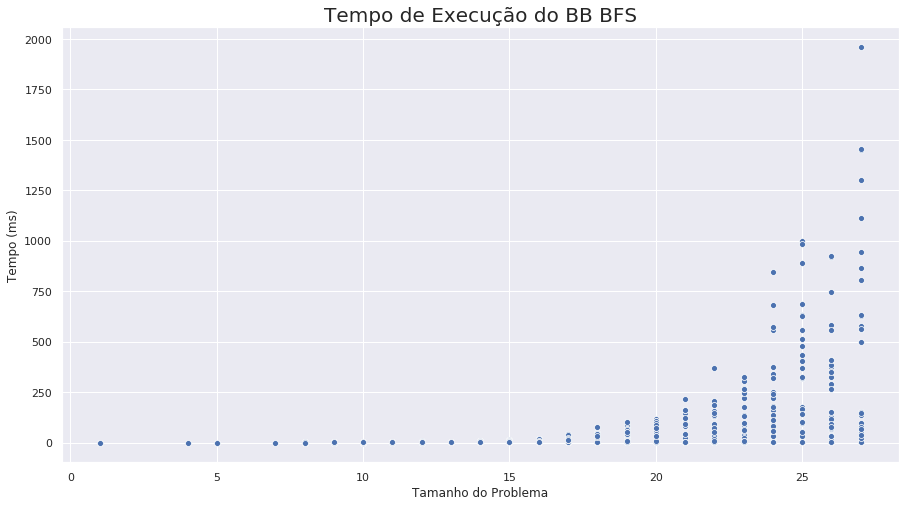

In [19]:
plt.figure(figsize=(15,8))
plt.title("Tempo de Execução do BB BFS", fontdict={"fontsize": 20})
sns.scatterplot(x = BB_BFS["Tamanho do Problema"], y = BB_BFS["Tempo (ms)"])
plt.savefig("graficos/BB_BFS_tempo")

### Analisando o número de passos

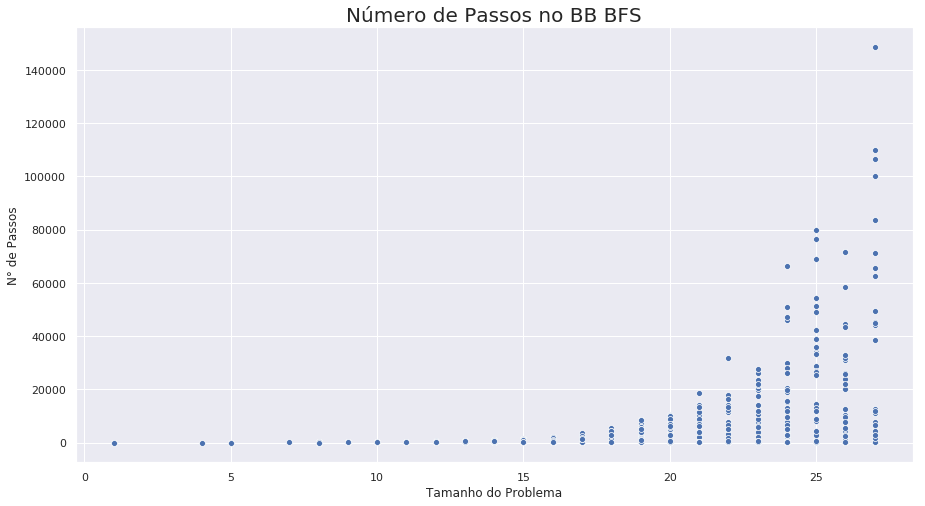

In [20]:
plt.figure(figsize=(15,8))
plt.title("Número de Passos no BB BFS", fontdict={"fontsize": 20})
sns.scatterplot(x = BB_BFS["Tamanho do Problema"], y = BB_BFS["N° de Passos"])
plt.savefig("graficos/BB_BFS_passos")

## Fazendo a análise de número de ótimos do Best_Fit

In [21]:
best_fit["isGreat"] = False

In [22]:
def verify_great(df, df_name, img_name):

    cont = 0
    for index, row in df.iterrows():
        resultado = row["ids"]
        verdadeiro = row["right_answer"]

        if(resultado is np.nan or verdadeiro is np.nan):
            df.at[index,"isGreat"] = True
            cont += 1
            continue

        resultado = resultado.split(" ")
        verdadeiro = verdadeiro.split(" ")


        resultado.remove("")
        verdadeiro.remove("")

        resultado = list(map(int,resultado))
        verdadeiro = list(map(int,verdadeiro))

        resultado.sort()
        verdadeiro.sort()

        if(resultado == verdadeiro):
            df.at[index,"isGreat"] = True
            cont += 1
    
    plt.figure(figsize=(8,8))
    plt.title(str(df_name), fontdict={"fontsize": 20})

    plt.pie(df["isGreat"].value_counts(), autopct="%1.1f%%", textprops={'color': "w", "fontsize":20})
    plt.savefig("graficos/{}".format(img_name))

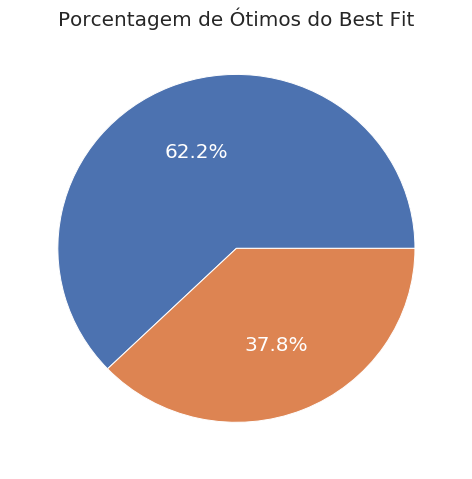

In [23]:
verify_great(best_fit, "Porcentagem de Ótimos do Best Fit", "otimo_best")

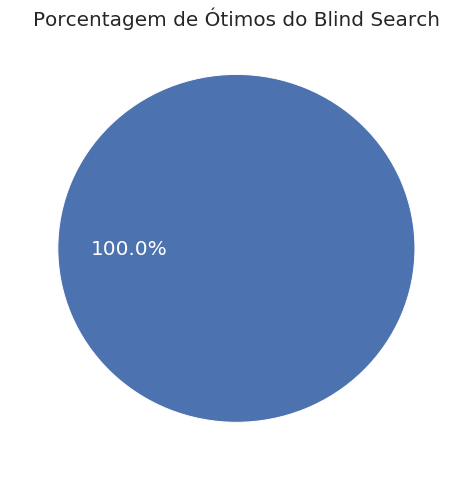

In [24]:
blind_search["isGreat"] = False
verify_great(blind_search, "Porcentagem de Ótimos do Blind Search", "otimo_blind")

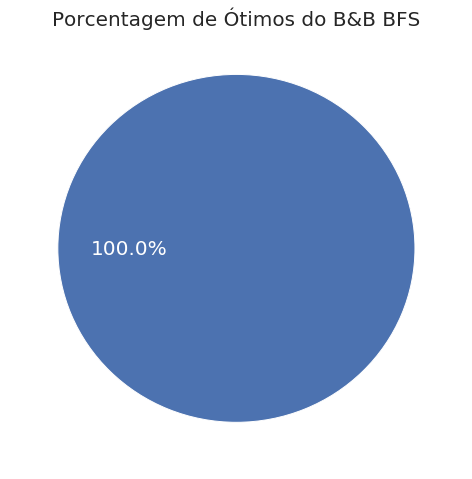

In [25]:
BB_BFS["isGreat"] = False
verify_great(BB_BFS, "Porcentagem de Ótimos do B&B BFS", "otimo_BB_BFS")

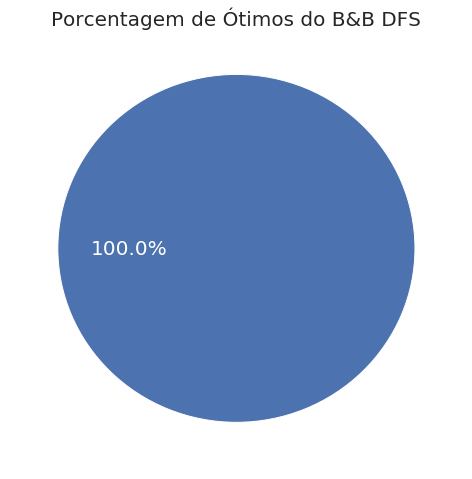

In [26]:
BB_DFS["isGreat"] = False
verify_great(BB_DFS, "Porcentagem de Ótimos do B&B DFS", "otimo_BB_DFS")